In [18]:
# Importing packages

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from PIL import Image

In [19]:
# Script to generate the csv files from the original data from MNIST

def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

In [20]:
PCA_COMPONENTS = 4

In [22]:
# Load the data
# ! IF first time loading notebook, -- uncoment two lines below (to convert raw data to csv)

#convert("datasets_raw/train-images-idx3-ubyte", "datasets_raw//train-labels-idx1-ubyte", "datasets/mnist_train.csv", 60000)
#convert("datasets_raw/t10k-images-idx3-ubyte", "datasets_raw/t10k-labels-idx1-ubyte", "datasets/mnist_test.csv", 10000)

train = pd.read_csv("datasets/mnist_train.csv")
#train.head()

In [23]:
# Dropping and saving labels column

dataset_labels = train['5']
dataset = train.drop('5', axis=1)

In [24]:
# Standartizing the data
# Performing standard scalar normalization to normalize our feature set, 
# because PCA performs best with a normalized feature set

dataset_std = StandardScaler().fit_transform(dataset)

## Applying PCA

In [25]:
# Applying PCA from scikit-learn
# Project the training data to PCA

pca = PCA(n_components=PCA_COMPONENTS)
dataset_train = pca.fit_transform(dataset_std)

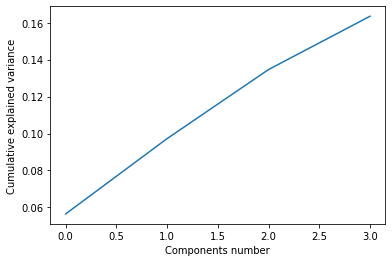

In [26]:
# Cumulative sum of variances of each of principal components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components number')
plt.ylabel('Cumulative explained variance');
plt.show()

# Evaluating perfomance of different classificators



In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 784 entries, 0 to 0.617
dtypes: int64(784)
memory usage: 358.9 MB


## Random forest classificator

In [28]:
# Training random forest classificator

clf = RandomForestClassifier()
clf.fit(dataset_train[:25000], dataset_labels[:25000])

RandomForestClassifier()

In [29]:
# Testing random forest classificator

expected = dataset_labels[25000:].tolist()
predicted = clf.predict(dataset_train[25000:])
print("Accuracy: ", accuracy_score(expected, predicted))

Accuracy:  0.6785336723906398


## K-nearest neighbors

In [30]:
# Training k-nearest neighbors classificator

clf = KNeighborsClassifier()
clf.fit(dataset_train[:25000], dataset_labels[:25000])

KNeighborsClassifier()

In [31]:
# Testing k-nearest neighbors classificator

expected = dataset_labels[25000:].tolist()
predicted = clf.predict(dataset_train[25000:])
print("Accuracy: ", accuracy_score(expected, predicted))

Accuracy:  0.6603902968656248


### LinearSVC

In [32]:
# Training linear support vector classificator

clf = LinearSVC()
clf.fit(dataset_train[:25000], dataset_labels[:25000])

/home/reybroncas/github/code_playground/python/image_recognition/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [33]:
# Testing linear support vector classificator

expected = dataset_labels[25000:].tolist()
predicted = clf.predict(dataset_train[25000:])
print("Accuracy: ", accuracy_score(expected, predicted))

Accuracy:  0.5504728706534472


### Single photo visual test

In [34]:
image, label = dataset.iloc[50000:50001].values.tolist()[0], dataset_labels.iloc[50000:50001].values.tolist()[0]

print("It is: ", label)

output = Image.new("L", (28, 28))
output.putdata(list(image))
output.show()

It is:  8


In [35]:
clf = RandomForestClassifier()
clf.fit(dataset_train[:50000], dataset_labels[:50000])

expected = dataset_labels[50000:50001].tolist()
predicted = clf.predict(dataset_train[50000:50001])
print("Predicted: ", predicted)

Predicted:  [8]
